In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# EDA

In [2]:
# Load the dataset
df = pd.read_csv('Hypertension-risk-model-main.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
0     1   39              0         0.0     0.0         0    195.0  106.0   
1     0   46              0         0.0     0.0         0    250.0  121.0   
2     1   48              1        20.0     0.0         0    245.0  127.5   
3     0   61              1        30.0     0.0         0    225.0  150.0   
4     0   46              1        23.0     0.0         0    285.0  130.0   

   diaBP    BMI  heartRate  glucose  Risk  
0   70.0  26.97       80.0     77.0     0  
1   81.0  28.73       95.0     76.0     0  
2   80.0  25.34       75.0     70.0     0  
3   95.0  28.58       65.0    103.0     1  
4   84.0  23.10       85.0     85.0     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null 

In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # or use appropriate imputation methods

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64


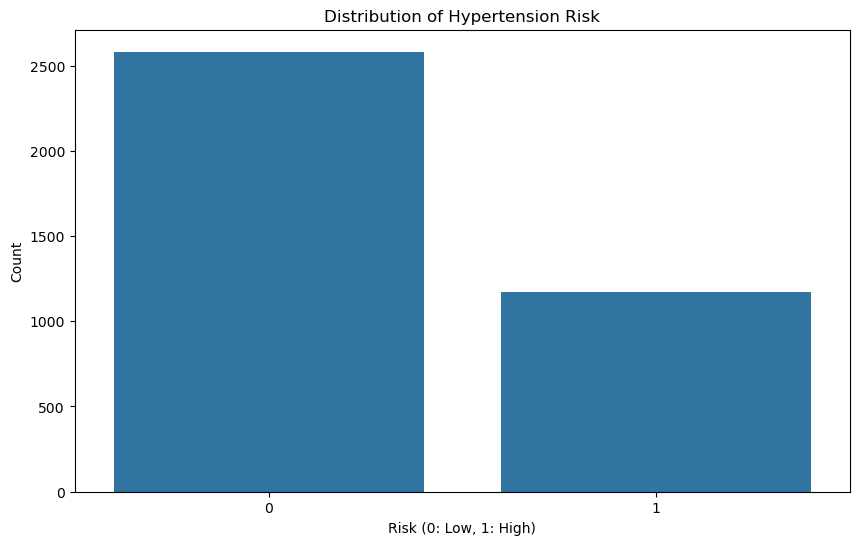

In [4]:
# 1. Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk', data=df)
plt.title('Distribution of Hypertension Risk')
plt.xlabel('Risk (0: Low, 1: High)')
plt.ylabel('Count')
plt.show()

In [5]:
# Calculate percentage of each class
risk_percentage = df['Risk'].value_counts(normalize=True) * 100
print("Percentage of each risk category:")
print(risk_percentage)


Percentage of each risk category:
Risk
0    68.808318
1    31.191682
Name: proportion, dtype: float64


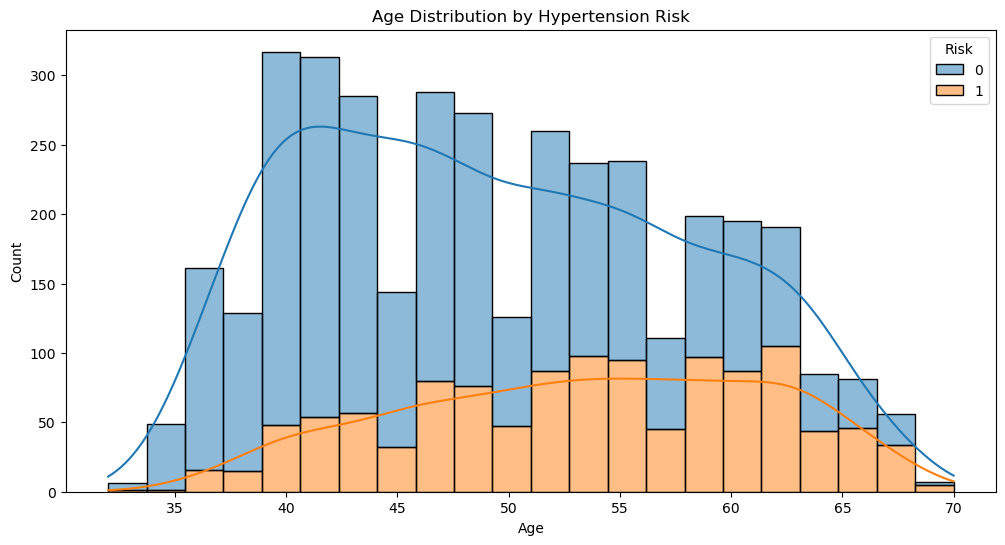

In [6]:
# 2. Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='Risk', kde=True, multiple="stack")
plt.title('Age Distribution by Hypertension Risk')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

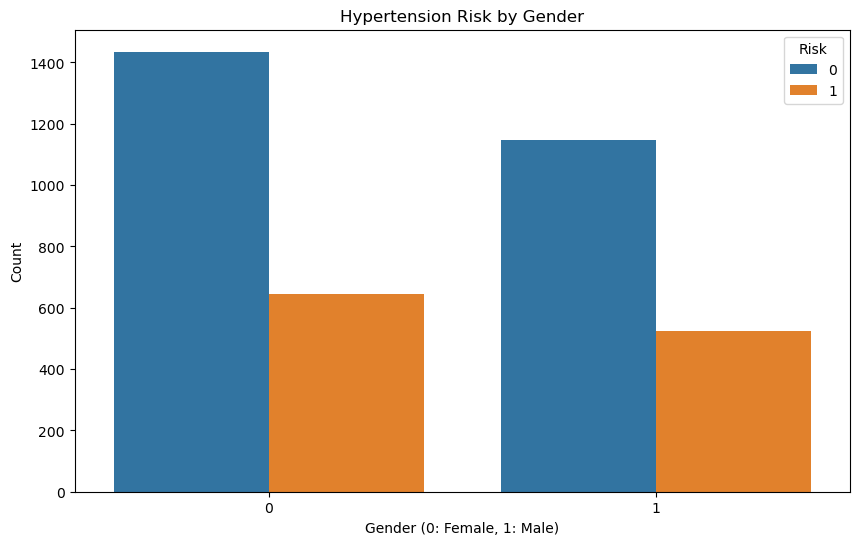

In [7]:
# 3. Gender and Risk
plt.figure(figsize=(10, 6))
sns.countplot(x='male', hue='Risk', data=df)
plt.title('Hypertension Risk by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

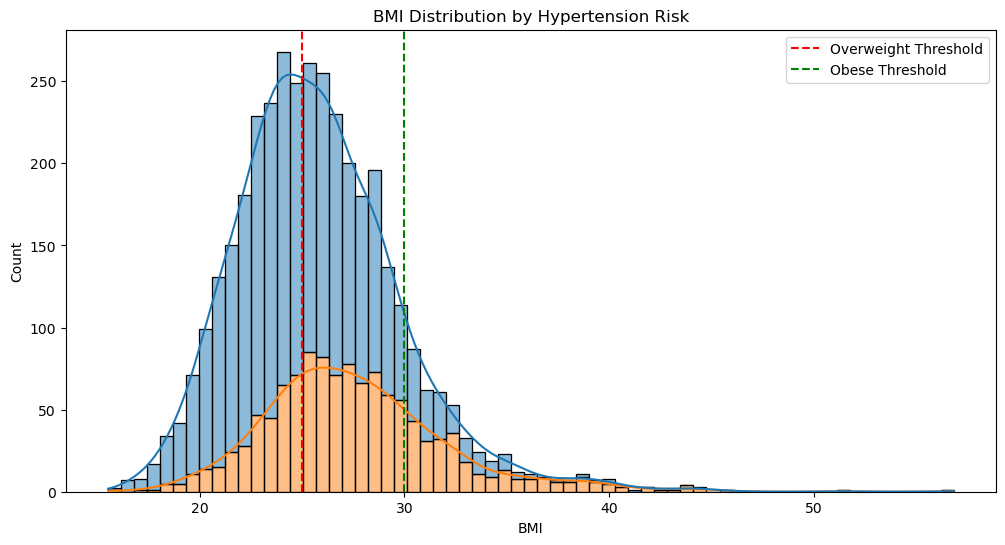

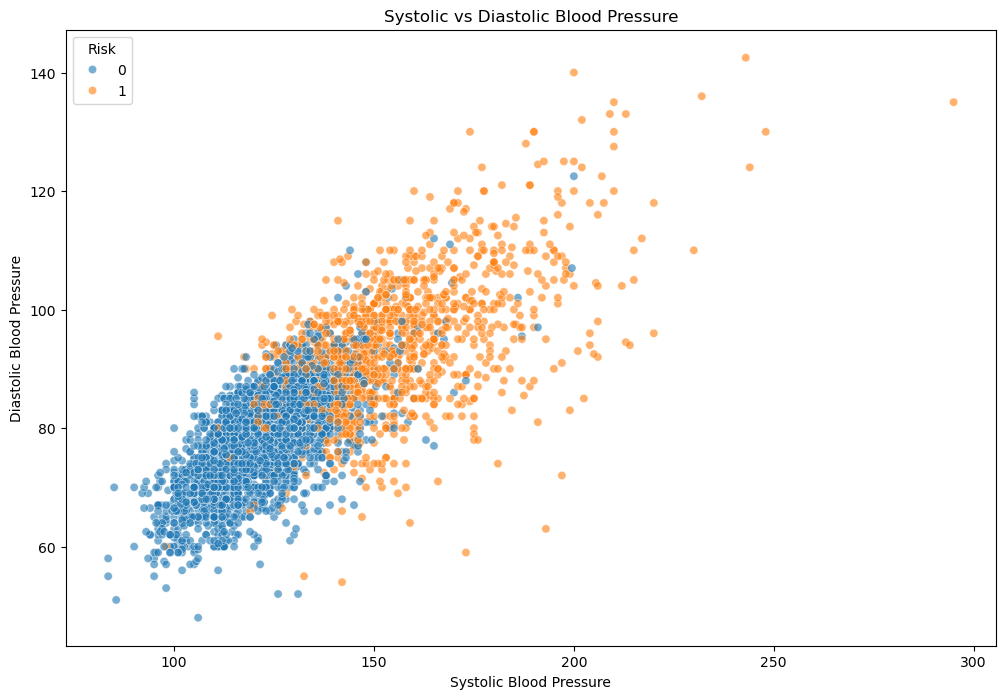

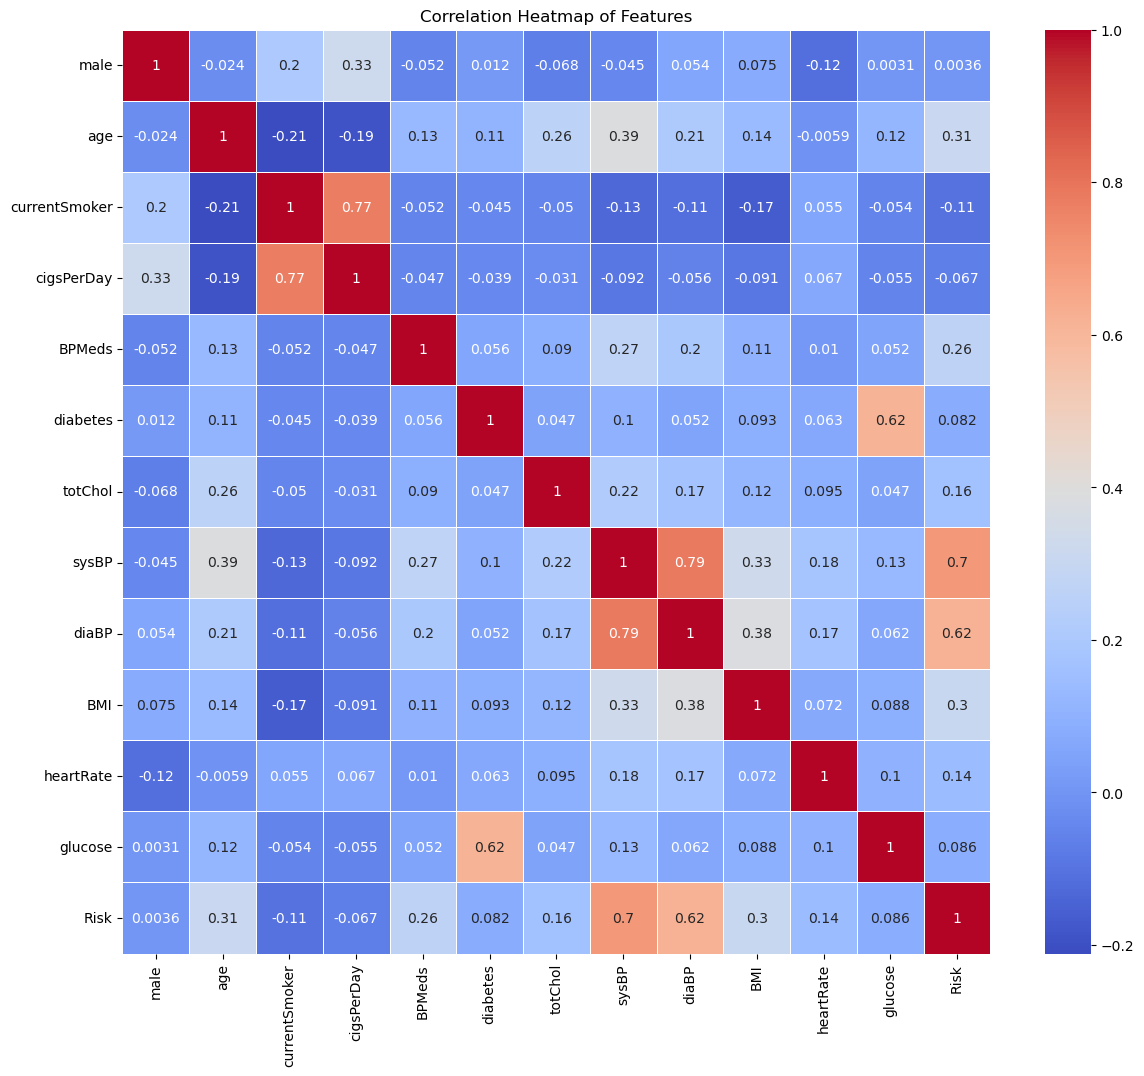

In [8]:
# 4. BMI Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='BMI', hue='Risk', kde=True, multiple="stack")
plt.title('BMI Distribution by Hypertension Risk')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.axvline(x=25, color='r', linestyle='--', label='Overweight Threshold')
plt.axvline(x=30, color='g', linestyle='--', label='Obese Threshold')
plt.legend()
plt.show()

# 5. Blood Pressure Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sysBP', y='diaBP', hue='Risk', data=df, alpha=0.6)
plt.title('Systolic vs Diastolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


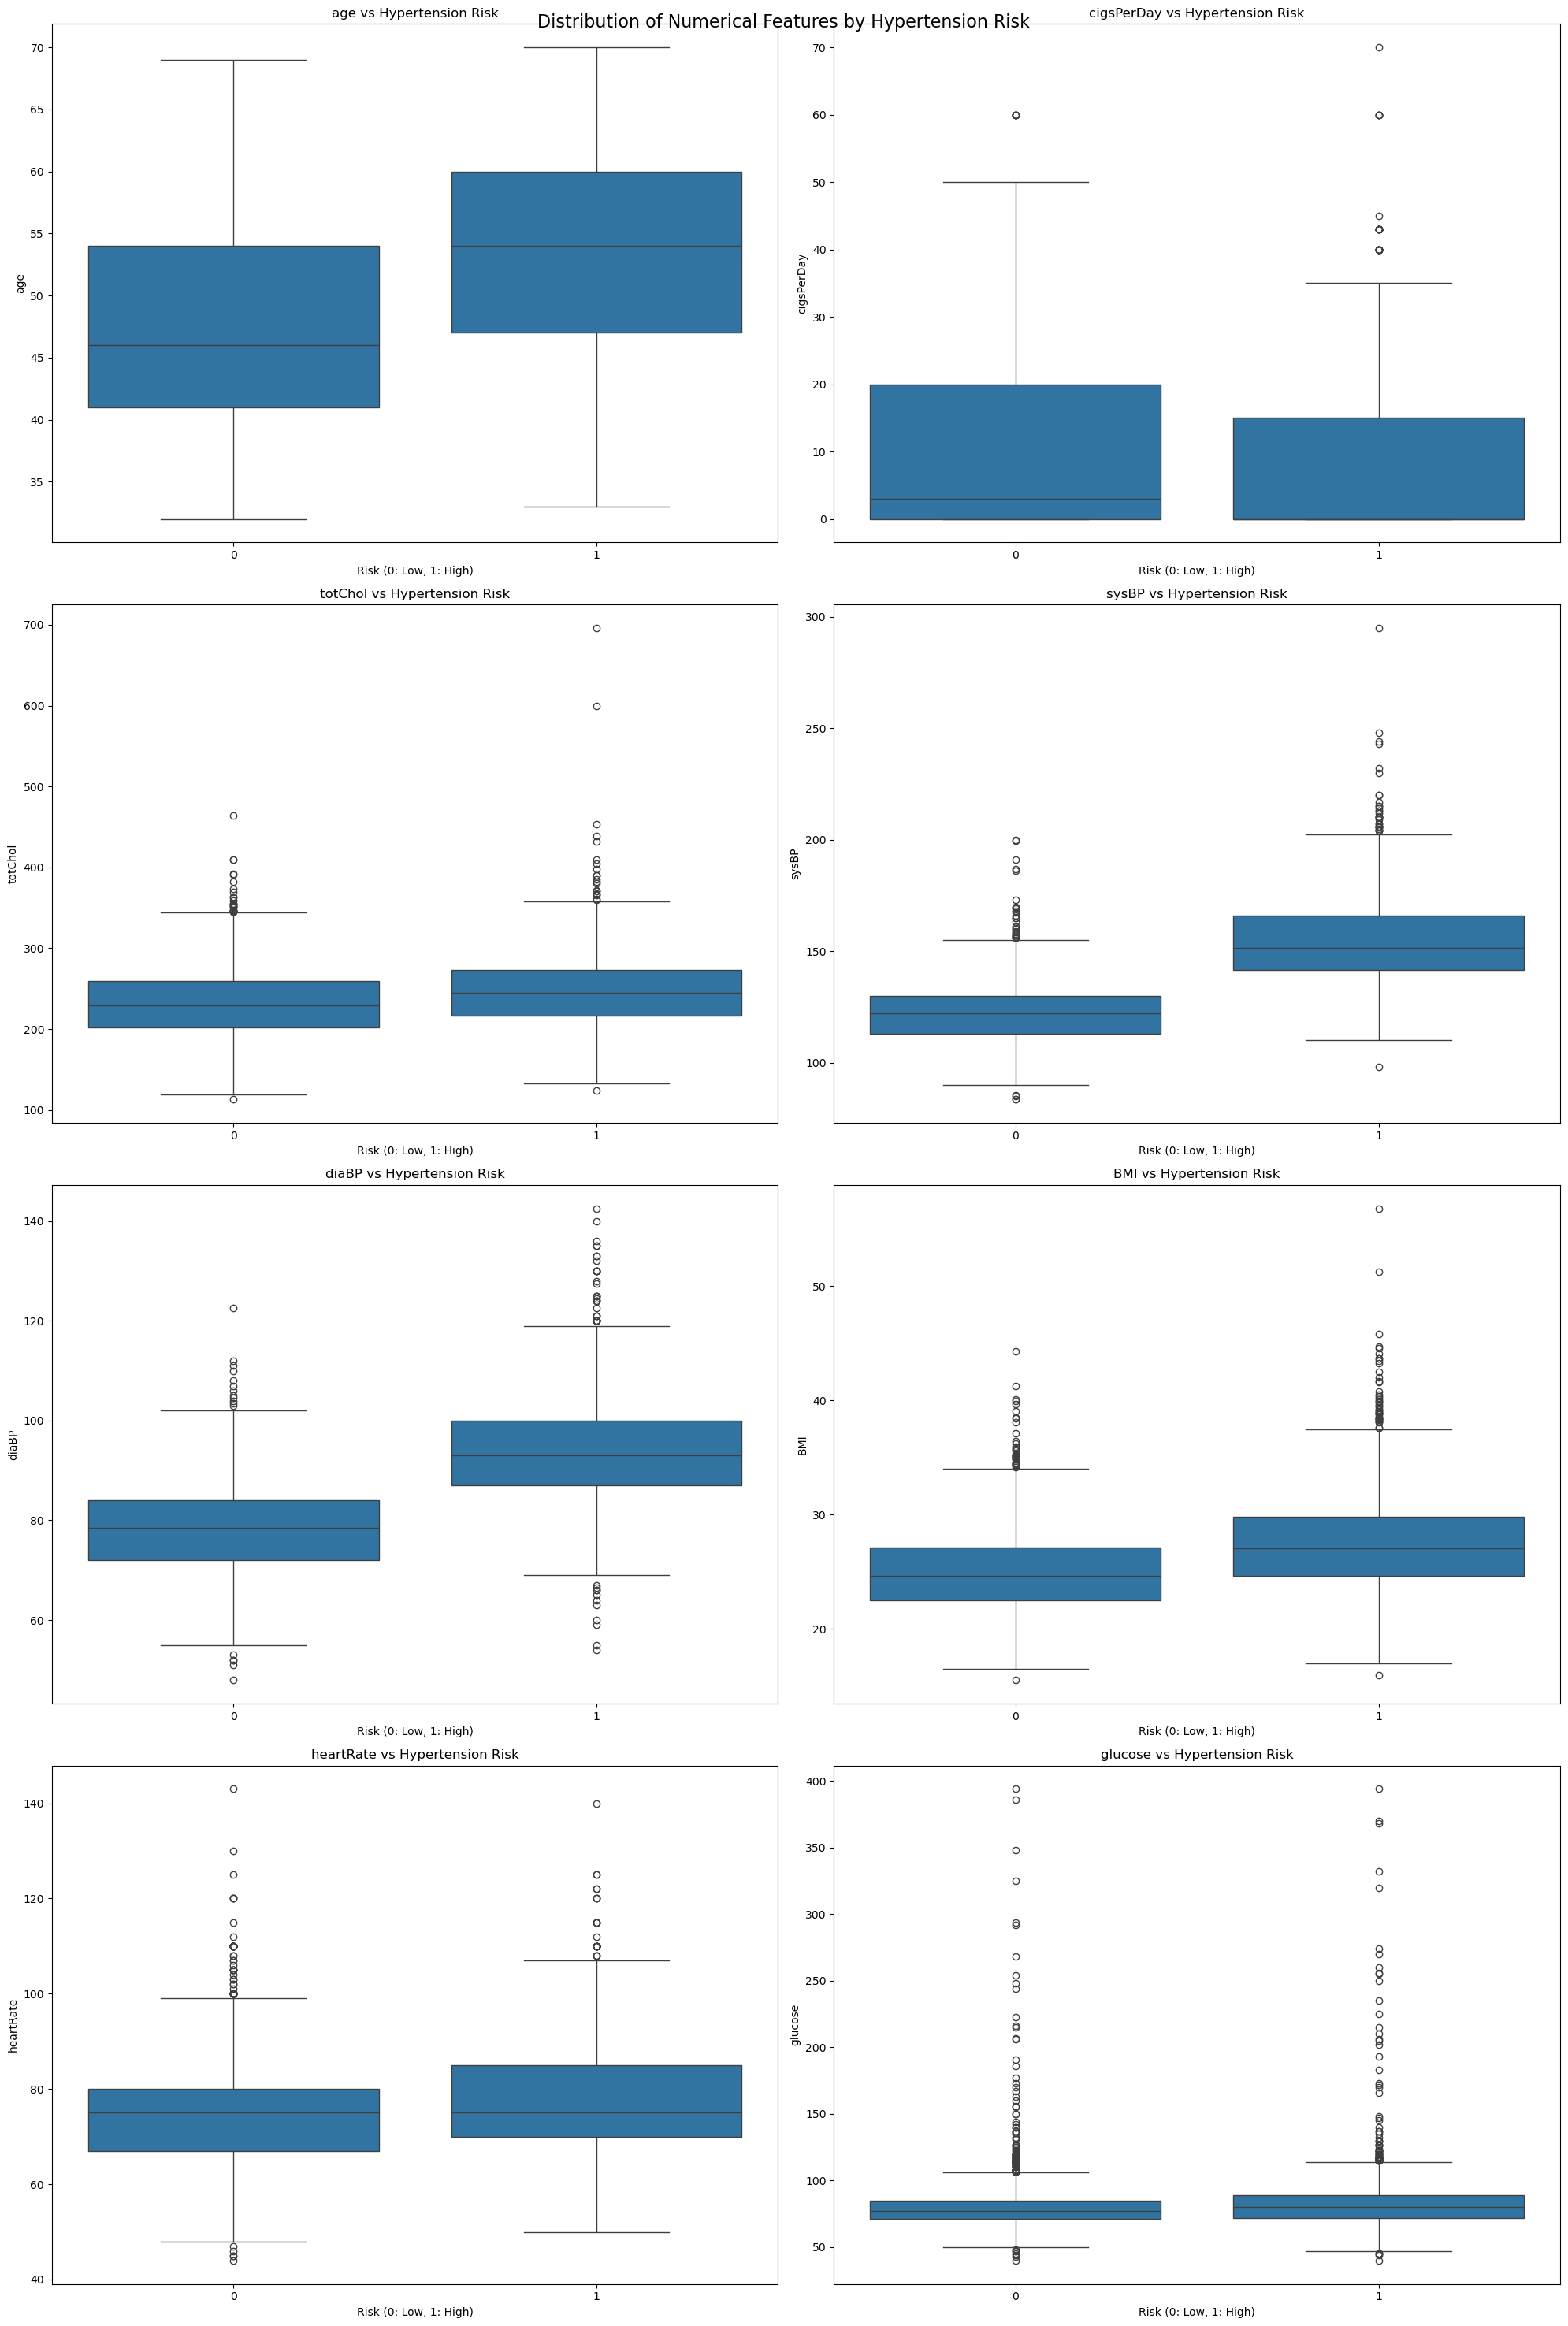

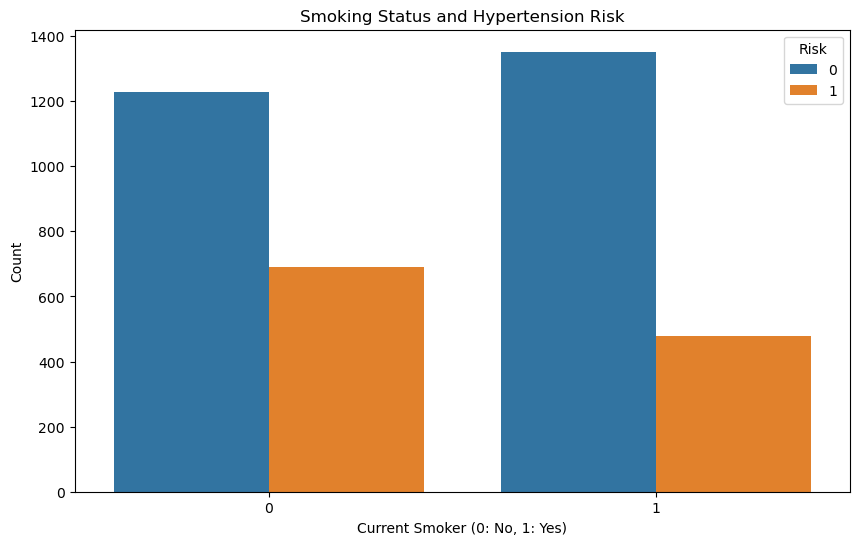

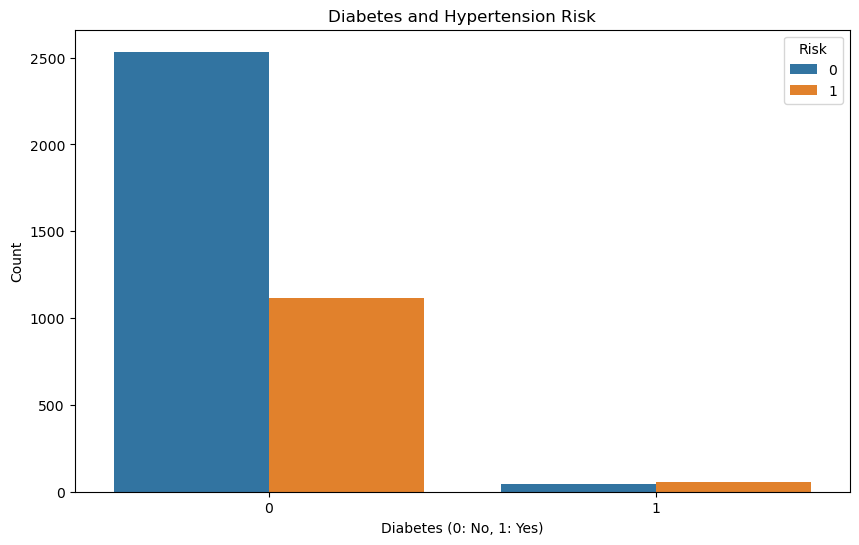

In [9]:
# 7. Box Plots for Key Numerical Features
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

fig, axes = plt.subplots(4, 2, figsize=(20, 30))
fig.suptitle('Distribution of Numerical Features by Hypertension Risk', fontsize=16)

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x='Risk', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Hypertension Risk')
    axes[row, col].set_xlabel('Risk (0: Low, 1: High)')

plt.tight_layout()
plt.show()

# 8. Smoking Status and Risk
plt.figure(figsize=(10, 6))
sns.countplot(x='currentSmoker', hue='Risk', data=df)
plt.title('Smoking Status and Hypertension Risk')
plt.xlabel('Current Smoker (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# 9. Diabetes and Risk
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', hue='Risk', data=df)
plt.title('Diabetes and Hypertension Risk')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# 10. Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# EDA Insights

## Basic Dataset Information

- Total Entries: 4240
- Columns: 13
- Data Types: The dataset includes both integer and float types.
- Missing Values:
        - cigsPerDay: 29 missing
        - BPMeds: 53 missing
        - totChol: 50 missing
        - BMI: 19 missing
        - heartRate: 1 missing
        - glucose: 388 missing

## 1. Distribution of Target Variable

- Visualization: Count plot of the Risk variable.
- Insight:
        - The dataset is imbalanced with 68.81% low risk (0) and 31.19% high risk (1).
        - Understanding this imbalance is crucial for model training and evaluation.

## 2. Age Distribution

- Visualization: Histogram of age colored by Risk with KDE.
- Insight:
        - The age distribution shows distinct patterns for low and high-risk categories.
        - Higher age tends to have a higher risk of hypertension.

## 3. Gender and Risk

- Visualization: Count plot of male variable with Risk as hue.
    -Insight:
        - Males have a slightly higher proportion of high-risk cases compared to females.

## 4. BMI Distribution

- Visualization: Histogram of BMI colored by Risk with KDE and vertical lines for overweight and obese thresholds.
- Insight:
        - High BMI is correlated with higher hypertension risk.
        - Thresholds show that many individuals in the high-risk category fall into overweight and obese ranges.

## 5. Blood Pressure Scatter Plot

- Visualization: Scatter plot of sysBP vs. diaBP colored by Risk.
- Insight:
        - There is a clear distinction between systolic and diastolic blood pressure in relation to hypertension risk.
        - High-risk individuals generally have higher systolic and diastolic blood pressures.

## 6. Correlation Heatmap

- Visualization: Heatmap of the correlation matrix of features.
- Insight:
        - Strong correlations observed between sysBP and diaBP, and between age and other features.
        - Helps in identifying multicollinearity and significant predictors for hypertension risk.

## 7. Box Plots for Key Numerical Features

- Visualization: Box plots of numerical features (age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose) against Risk.
- Insight:
        - These plots highlight significant differences in the distribution of numerical features between low and high-risk categories.
        - Notable differences are observed in sysBP, diaBP, and BMI.

## 8. Smoking Status and Risk

- Visualization: Count plot of currentSmoker with Risk as hue.
- Insight:
        - Current smokers are more likely to be in the high-risk category.
        - Smoking status is a significant factor in hypertension risk.

## 9. Diabetes and Risk

- Visualization: Count plot of diabetes with Risk as hue.
- Insight:
        - Individuals with diabetes are more likely to be at high risk of hypertension.
        - Diabetes status is a significant predictor of hypertension risk.


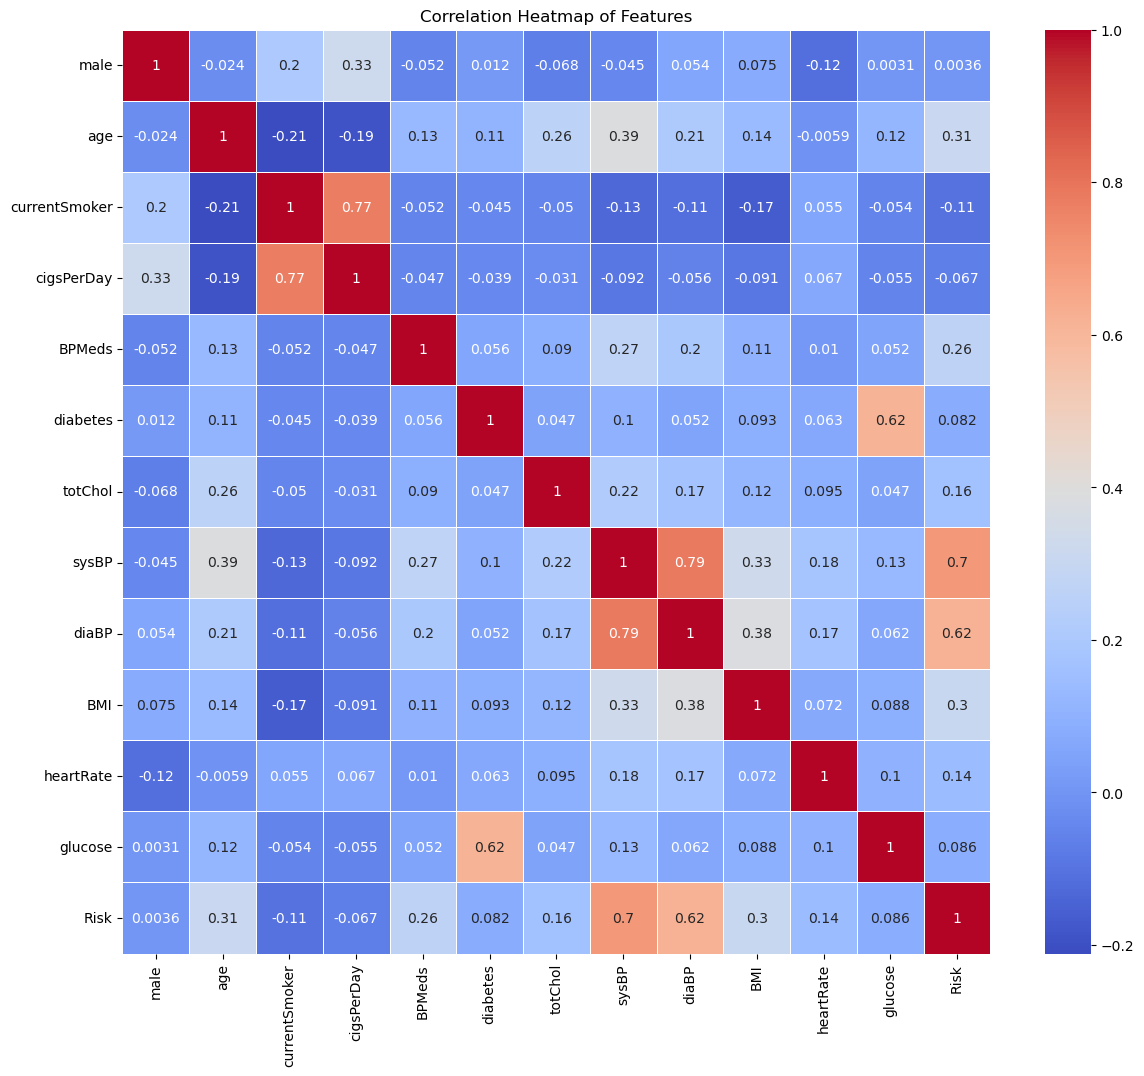

In [10]:
# 6. Correlation Heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()